# 1. Cox-Ingersoll-Ross Interest Rate Model
Sources:
* Shreve, Continous Time Finance II Chapter 6
* https://towardsdatascience.com/stochastic-processes-simulation-the-cox-ingersoll-ross-process-c45b5d206b2b

## 1a. Model Formulation

Let $R(t)$ be the interest rate. Then under the model, $R(t)$ satisfies the following SDE:

$$dR(t)=(a-bR(t))dt+\sigma\sqrt{R(t)}dB_t$$

where all constants $a,b,\sigma>0$.

(Side note: normally the risk neutral measure $d\tilde{B_t}$ is used instead of $dB_t$. For simplicity, I will use $dB_t$ here but I will revisit after I learn how to construct the risk neutral measure.)

Now suppose we have some discount process

$$D(t)=e^{-\int_0^t R(s) ds}$$

Suppose now we have a zero coupon bond with face value 1 and a fixed maturity $T$. Under the risk neutral measure, $D(t)B(t,T)$ must be a martingale. Thus:

$$D(t)B(t,T)=\tilde{\mathbb{E}}[D(T)B(T,T)|\mathcal{F}_t]=\tilde{\mathbb{E}}[D(T)|\mathcal{F}_t]$$

as $B(T,T)=1$ as prescribed. Dividing both sides by $D(t)$:

$$\implies B(t,T)=\tilde{\mathbb{E}}[e^{-\int_t^T R(s) ds}|\mathcal{F}_t]$$

Now let $f(t,R(t))=\tilde{\mathbb{E}}[e^{-\int_t^T R(s) ds}|\mathcal{F}_t]$. Using Ito's product rule:

$$d(D(t)f(t,R(t))=f(t,R(t))dD(t)+D(t)df(t,R(t))+dD(t)df(t,R(t))$$

Now observe that we have $dD(t)=-R(t)D(t)dt=-f(t,R(t))dt$ and:

$$df(t,R(t))=f_t dt+f_xdR(t)+\frac{f_{xx}}{2}dR(t)dR(t)$$

We will stop writing $f,D,R$ with their inputs. Notice that since $dD(t)$ is only in terms of $dt$, $dD(t)dR(t)=0$.

$$\implies d(Df)=f(-RDdt)+D(f_t dt+f_xdR(t)+\frac{f_{xx}}{2}dR(t)dR(t))+0$$

Using the given CIR process definition at the beginning, $dRdR=\sigma^2Rdt$:

$$\implies d(Df)=D(-Rf+f_t)dt+f_x((a-bR)dt+\sigma\sqrt{R}dB_t)+\frac{\sigma^2Rf_{xx}}{2}dt$$

$$\implies d(Df)=D(-Rf+f_t+(a-bR)f_x+\frac{\sigma^2Rf_{xx}}{2})dt+f_x\sigma\sqrt{R}dB_t)$$

Then for $D(t)f(t,R(t))$ to be a martingale we need it to satisfy the PDE:

$$-xf+f_t+(a-bx)f_x+\frac{\sigma^2xf_{xx}}{2}=0$$

which is a PDE only in terms of $f(t,R(t))$. 

## 1b. Solution

We will guess the solution to be of the form $f(t,x)=e^{-xC(t,T)-D(t,T)}$. Plugging it into the PDE:

* $f_t=(-C'x-D')f$


* $f_x=-Cf$


* $f_{xx}=C^2f$

$$\implies -xf+(-C'x-D')f-(a-bx)Cf+\frac{\sigma^2C^2xf}{2}=0$$

Regrouping terms:

$$xf(-1-C'+bC+\frac{\sigma^2C^2}{2})+f(-D'-aC)=0$$

Then we get two equations:

$$C'=-1+bC+\frac{\sigma^2C^2}{2}$$

$$D'=-aC$$

(From now on, I follow question 6.4 from Shreve to aid the solution)

Let's define $\phi(t)=e^{\frac{\sigma^2}{2}\int_t^T C(s,T)ds}$. Then:

$$\phi'(t)=\frac{\sigma^2}{2}(-C(t,T))\phi(t)\implies C(t,T)=-\frac{2\phi'(t)}{\sigma^2\phi(t)}$$ 

$$\implies C'=-\frac{2\phi''(t)\sigma^2\phi(t)-2\sigma^2\phi'^2(t)}{\sigma^4\phi^2(t)}=-\frac{2\phi''(t)}{\sigma^2\phi(t)}+\frac{\sigma^2}{2}\bigg(\frac{2\phi'(t)}{\sigma^2\phi(t)}\bigg)^2=-\frac{2\phi''(t)}{\sigma^2\phi(t)}+\frac{\sigma^2}{2}C^2$$


Notice we can rewrite the other equation we have from the PDE and plugging in $C=-\frac{2\phi'(t)}{\sigma^2\phi(t)}$:

$$C'=\frac{\sigma^2C^2}{2}-1-b\frac{2\phi'(t)}{\sigma^2\phi(t)}$$

Subtracting the previous two equations from each other:

$$-\frac{2\phi''(t)}{\sigma^2\phi(t)}+1+b\frac{2\phi'(t)}{\sigma^2\phi(t)}=0$$

$$\implies \frac{2\phi''(t)}{\sigma^2\phi(t)}-b\frac{2\phi'(t)}{\sigma^2\phi(t)}=1$$

$$\implies \phi''(t)-b\phi'(t)-\frac{\sigma^2\phi(t)}{2}=0$$

Now solving this constant coefficient ODE using the characteristic equation $r^2-br-\frac{\sigma^2}{2}=0$:

$$r=\frac{b\pm\sqrt{b^2+2\sigma^2}}{2}$$

$$\implies \phi(t)=c_1e^{t\frac{b+\sqrt{b^2+2\sigma^2}}{2}}+c_2e^{t\frac{b-\sqrt{b^2+2\sigma^2}}{2}}$$

Using the initial conditions that $\phi(T)=0$ and $\phi'(T)=0$, we then get 

$$\phi(t)=\frac{2c_1}{b+\sqrt{b^2+2\sigma^2}}e^{\frac{b+\sqrt{b^2+2\sigma^2}}{2}(t-T)}-\frac{2c_1}{b-\sqrt{b^2+2\sigma^2}}e^{\frac{b-\sqrt{b^2+2\sigma^2}}{2}(t-T)}$$

Substituting $\gamma=\frac{\sqrt{b^2+2\sigma^2}}{2}$:

$$\phi(t)=\frac{c_1}{\frac{b}{2}+\gamma}e^{(\frac{b}{2}+\gamma)(t-T)}-\frac{c_1}{\frac{b}{2}-\gamma}e^{(\frac{b}{2}-\gamma)(t-T)}=c_1e^{-\frac{b}{2}(T-t)}\bigg[\frac{e^{-\gamma(T-t)}(\frac{b}{2}-\gamma)-e^{\gamma(T-t)}(\frac{b}{2}+\gamma)}{\frac{b^2}{4}-\gamma^2}\bigg]$$

$$\implies \phi(t)=c_1e^{-\frac{b}{2}(T-t)}\bigg[\frac{(e^{-\gamma(T-t)}-e^{\gamma(T-t)})\frac{b}{2}+(-e^{\gamma(T-t)}-e^{\gamma(T-t)})\gamma}{\frac{b^2}{4}-\gamma^2}\bigg]$$

Using $\cosh u=\frac{e^u+e^{-u}}{2}$, $\sinh u=\frac{e^u-e^{-u}}{2}$ and reincorporating the definition of $\gamma$:

$$\implies \phi(t)=c_1e^{-\frac{b}{2}(T-t)}\bigg[\frac{-b\sinh(\gamma(T-t))-2\gamma\cosh(\gamma(T-t))}{\frac{b^2}{4}-(\frac{\sqrt{b^2+2\sigma^2}}{2})^2}\bigg]$$

$$\implies \phi(t)=c_1e^{-\frac{b}{2}(T-t)}\frac{2}{\sigma^2}[b\sinh(\gamma(T-t))+2\gamma\cosh(\gamma(T-t))]$$

Using the fact that $\frac{d(\cosh x)}{dx}=\sinh x$ and $\frac{d(\sinh x)}{dx}=\cosh x$:

$$\phi'(t)=\frac{b\phi(t)}{2}+\frac{2c_1}{\sigma^2}e^{-\frac{b}{2}(T-t)}[-b\gamma\cosh(\gamma(T-t))-2\gamma^2\sinh(\gamma(T-t))]$$

$$\implies \phi'(t)=\frac{c_1b^2}{\sigma^2}e^{-\frac{b}{2}(T-t)}\sinh(\gamma(T-t))=\frac{4c_1(\frac{\sqrt{b^2+2\sigma^2}}{2})^2}{\sigma^2}e^{-\frac{b}{2}(T-t)}\sinh(\gamma(T-t))$$

$$\implies \phi'(t)=-2c_1e^{-\frac{b}{2}(T-t)}\sinh(\gamma(T-t))$$

Now using the previously derived formula that $C(t,T)=\frac{-2\phi'(t)}{\sigma^2\phi(t)}$:

$$C(t,T)=\frac{4c_1e^{-\frac{b}{2}(T-t)}\sinh(\gamma(T-t))}{\sigma^2c_1\frac{2}{\sigma^2}e^{-\frac{b}{2}(T-t)}[b\sinh(\gamma(T-t)+2\gamma\cosh(\gamma(T-t))]}=\frac{\sinh(\gamma(T-t))}{\frac{b}{2}\sinh(\gamma(T-t))+\gamma\cosh(\gamma(T-t))}$$

We also have that $D'(t,T)=\frac{2a\phi'(t)}{\sigma^2\phi(t)}$. Integrating both sides from t to T:

$$\int_t^T D'(s,T)\,ds=\frac{2a}{\sigma^2}\int_t^T\frac{\phi'(s)}{\phi(s)}\,ds$$

Using FTC:

$$\implies D(T,T)-D(t,T)=\frac{2a}{\sigma^2}\log(\phi(T))-\log(\phi(t))$$

$$\implies D(t,T)=-\frac{2a}{\sigma^2}\log\bigg(\frac{\frac{2c_1}{\sigma^2}2\gamma}{c_1e^{-\frac{b}{2}(T-t)}\frac{2}{\sigma^2}[b\sinh(\gamma(T-t))+2\gamma\cosh(\gamma(T-t))}\bigg)=-\frac{2a}{\sigma^2}\log\bigg(\frac{\gamma e^{\frac{b}{2}(T-t)}}{\frac{b}{2}\sinh(\gamma(T-t))+\gamma\cosh(\gamma(T-t))}\bigg)$$

### Then the solution becomes:

$$f(t,x)=\exp\bigg( -\frac{\sinh(\gamma(T-t))}{\frac{b}{2}\sinh(\gamma(T-t))+\gamma\cosh(\gamma(T-t))}x+\frac{2a}{\sigma^2}\log\bigg(\frac{\gamma e^{\frac{b}{2}(T-t)}}{\frac{b}{2}\sinh(\gamma(T-t))+\gamma\cosh(\gamma(T-t))}\bigg)\bigg)$$ 

where $\gamma=\sqrt{b^2+2\sigma^2}$.

## 1c. Simulating the interest rate process $R(t)$:

In [1]:
from dataclasses import dataclass
from typing import Optional, NoReturn, Any
import numpy as np

@dataclass 
class CIRParams:
    alpha: float # mean reversion parameter
    beta: float # long run mean
    sigma: float # fluctuation scaling parameter
        
    def __post_init__(self) -> Optional[NoReturn]:
        if 2*self.alpha*self.beta < self.sigma ** 2:
            raise ValueError(r"2*$\alpha * \beta$ has to be less than or equal to $\sigma^2$.")
        return None 

Importing the Brownian Motion code from the Ornstein Uhlenbeck document:

In [2]:
def dBt(T: int, random_state: Optional[int] = None) -> np.ndarray:
    '''
    Simulates Brownian Motion increments dB_t for T times 
    random_state allows for the use of the same randomness seed
    '''   
    np.random.seed(random_state)
    return np.random.normal(0.0, 1.0, size=T)
    
def Bt(T: int, random_state: Optional[int] = None) -> np.ndarray:
    '''
    Simulates Brownian Motion by cumulative summing increments  
    random_state allows for the use of the same randomness seed
    '''  
    dB_t = dBt(T, random_state)
    B_t = dB_t.cumsum()
    return np.insert(B_t, 0, 0)[:-1]

Defining the helper functions:

In [3]:
def CIR_process(T: int, params: CIRParams, r_0: Optional[float] 
               = None, random_state: Optional[int] = None) -> np.ndarray:
    """
    Generates iterations for T times.
    params is an instance of CIRParams dataclass.
    r_0s the initial value. If None, then r_0 is taken
        to be beta, the long run mean.
    Returns a 1D array.
    """
    if not r_0:
        r_0 = params.beta
    dB_t = dBt(T, random_state)
    return generate_CIR_process(dB_t, params, r_0)

def generate_CIR_process(dB_t: np.ndarray, params: CIRParams, r_0: float) -> np.ndarray:
    """
    Generate the CIR process given the Brownian motion.
    dB_t is a 1D array of Brownian motion increments.
    Returns a 1D array.
    """
    T = len(dB_t)
    r_t = [r_0]
    for t in range(1,T):
        dr_t = params.alpha * (params.beta - r_t[t-1]) + params.sigma * np.sqrt(r_t[t-1]) * dB_t[t]
        validate_not_nan(dr_t)
        r_t.append(r_t[t-1] + dr_t)
    return np.asarray(r_t)
    
def validate_not_nan(dr_t: Any) -> Optional[NoReturn]:
    """
    Checks if an iteration of the CIR process returns none.
    """
    if np.isnan(dr_t):
        raise ValueError('CIR process crashed, check your parameters.')
    return None

Plotting the interest rate process:

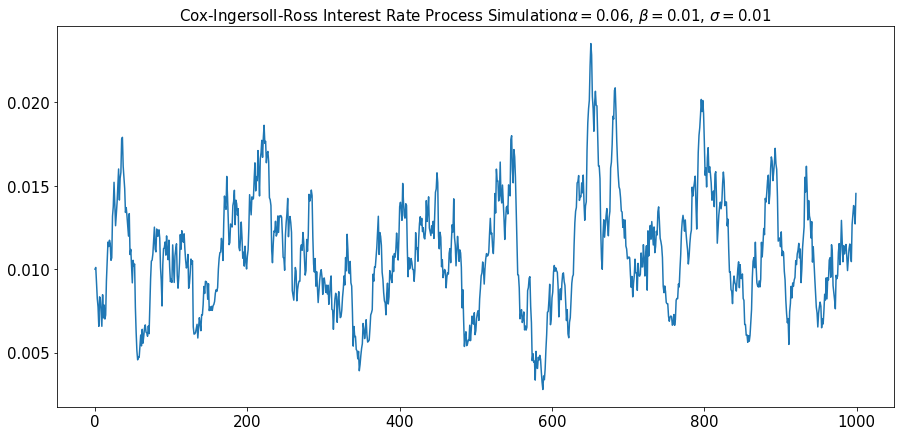

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,7))

title = "Cox-Ingersoll-Ross Interest Rate Process Simulation" + r"$\alpha=0.06$, $\beta=0.01$, $\sigma=0.01$"

CIR_params = CIRParams(alpha=0.06, beta=0.01, sigma=0.01)
cir1 = CIR_process(1000, CIR_params)

plt.plot(cir1)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


## Simulating the payout function $f(t,R(t))$

In [5]:
def ZCB_CIR(T: int, params: CIRParams, r_0: Optional[float] 
               = None, random_state: Optional[int] = None) -> np.ndarray:
    """
    Generates iterations for T times.
    params is an instance of CIRParams dataclass.
    r_0s the initial value. If None, then r_0 is taken
        to be beta, the long run mean.
    Returns a 1D array.
    """
    if not r_0:
        r_0 = params.beta
    dB_t = dBt(T, random_state)
    return generate_ZCB_CIR(dB_t, params, r_0)

def generate_ZCB_CIR(dB_t: np.ndarray, params: CIRParams, r_0: float) -> np.ndarray:
    """
    Generate the CIR process given the Brownian motion.
    dB_t is a 1D array of Brownian motion increments.
    Returns a 1D array.
    """
    T = len(dB_t)
    R_t = [r_0]
    zcb_t = [ZCB(0, T, r_0, params)]
    for t in range(1,T):
        dr_t = params.alpha * (params.beta - R_t[t-1]) + params.sigma * np.sqrt(R_t[t-1]) * dB_t[t]
        validate_not_nan(dr_t)
        r_t = R_t[t-1] + dr_t
        R_t.append(R_t[t-1] + dr_t)
        zcb_t.append(ZCB(t, T, r_t, params))
    return np.asarray(zcb_t)
    
def ZCB(t: int, T: int, r_t: float, params: CIRParams):
    '''
    Returns the value of the zero coupon bond with face value 1 at time t based on our solution from the model
    '''
    gamma = np.sqrt(params.beta ** 2 + 2 * params.sigma ** 2)
    denom = (gamma * np.cosh(gamma * (T - t)) + params.beta / 2 * np.sinh(gamma * (T - t)))
    C_term = np.sinh(gamma * (T - t)) / denom
    A_term = - 2 * params.alpha / (params.sigma ** 2) * np.log(gamma * np.exp(params.beta / 2 * (T - t)) / denom)
    return np.exp(- C_term * r_t - A_term)

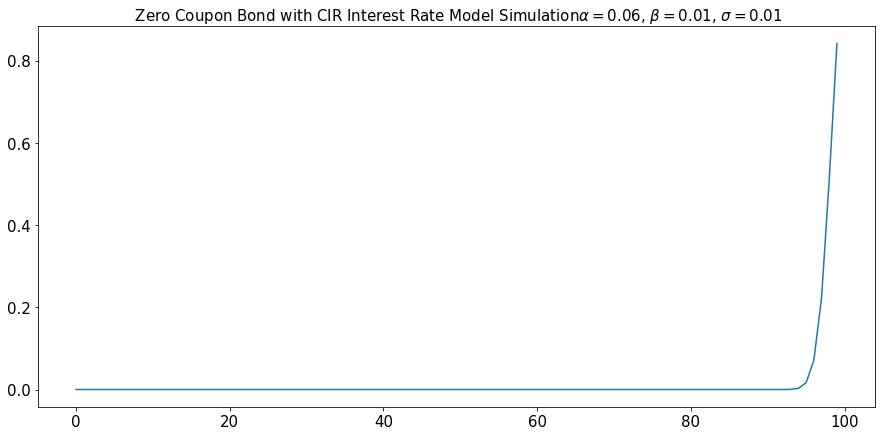

In [7]:
fig = plt.figure(figsize=(15,7))

title = " Zero Coupon Bond with CIR Interest Rate Model Simulation" + r"$\alpha=0.06$, $\beta=0.01$, $\sigma=0.01$"

CIR_params = CIRParams(alpha=0.06, beta=0.01, sigma=0.01)
zcb1 = ZCB_CIR(100, CIR_params)

plt.plot(zcb1)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
